In [20]:
import pca
import numpy as np

import importlib
importlib.reload(pca)

data_mat = pca.load_data_set("../Data/PCA/testSet.txt")

In [26]:
low_d_mat, recon_mat = pca.pca(data_mat, 1)
np.shape(low_d_mat)

(1000, 1)

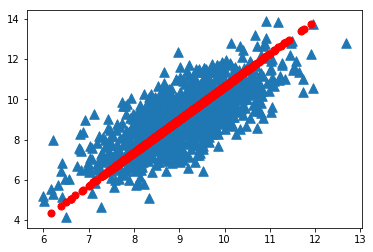

In [27]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:,0].flatten().A[0], data_mat[:,1].flatten().A[0], marker='^', s=90)

ax.scatter(recon_mat[:,0].flatten().A[0], recon_mat[:,1].flatten().A[0], marker='o', s=50, c='red')

In [29]:
from numpy import *

def replaceNanWithMean(): 
    datMat = pca.load_data_set('../Data/PCA/secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [35]:
dataMat = replaceNanWithMean()
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals

covMat = cov(meanRemoved, rowvar=0)
eigVals,eigVects = linalg.eig(mat(covMat))
print(shape(meanRemoved), shape(covMat), shape(eigVals), shape(eigVects))

print(covMat)

(1567, 590) (590, 590) (590,) (590, 590)
[[ 5.39940056e+03 -8.47962623e+02  1.02671010e+01 ... -1.67440688e-02
  -5.93197815e-03  2.87879850e+01]
 [-8.47962623e+02  6.43649877e+03  1.35942679e+01 ...  1.21967287e-02
   2.32652705e-03  3.37335304e+02]
 [ 1.02671010e+01  1.35942679e+01  8.63239193e+02 ... -7.59126039e-03
  -2.59521865e-03 -9.07023669e+01]
 ...
 [-1.67440688e-02  1.21967287e-02 -7.59126039e-03 ...  7.75231441e-05
   2.45865358e-05  3.22979001e-01]
 [-5.93197815e-03  2.32652705e-03 -2.59521865e-03 ...  2.45865358e-05
   8.21484994e-06  1.04706789e-01]
 [ 2.87879850e+01  3.37335304e+02 -9.07023669e+01 ...  3.22979001e-01
   1.04706789e-01  8.81006310e+03]]
